In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [3]:
matplotlib.rcParams['figure.figsize'] = (12,8)

In [4]:
import zipfile
with zipfile.ZipFile("zippedData.zip","r") as zip_ref:
    zip_ref.extractall()

### Load and prepare the movie gross csv

In [5]:
#movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv')

In [6]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
# drop null studio values
movie_gross_df.dropna(subset = ['studio'],inplace = True)

In [9]:
#some values in foreign_gross column have commas. To remove the commas
def replace_comma(val):
    return str(val).replace(",", "").strip()

In [10]:
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].apply(replace_comma)

In [11]:
#change data type of foreign_gross to numeric
movie_gross_df['foreign_gross'] = pd.to_numeric(movie_gross_df['foreign_gross'], errors='coerce')

In [12]:
# replace missing values in domestic and foreign gross with the mean of those columns
movie_gross_df['domestic_gross'].fillna(movie_gross_df['domestic_gross'].mean(), inplace = True)
movie_gross_df['foreign_gross'].fillna(movie_gross_df['foreign_gross'].mean(), inplace = True)

In [13]:
movie_gross_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### Load and prepare the movie title basics csv

In [14]:
movie_title_basics_df = pd.read_csv('zippedData/title.basics.csv')

In [15]:
movie_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [16]:
movie_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [17]:
# drop null runtime minutes,null original titles and null genres
movie_title_basics_df.dropna(subset = ['runtime_minutes', 'genres', 'original_title'],inplace = True)

In [18]:
movie_title_basics_df.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [19]:
#Split genres into separate columns
genre = movie_title_basics_df['genres'].str.split(',', expand = True) # returns a list of the genres
movie_title_basics_df['genre1'] = genre[0]
movie_title_basics_df['genre2'] = genre[1]
movie_title_basics_df['genre3'] = genre[2]

In [20]:
movie_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre1,genre2,genre3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,Drama,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,None,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,Comedy,None,None


### Load and prepare the movie budgets csv

In [21]:
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv')

In [22]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [23]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [24]:
# replace $ and comma in the budget and gross revenues
def replace_comma_and_dollar(col_val):
    return col_val.replace("$", "").replace(",", "")

In [25]:
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(replace_comma_and_dollar)
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(replace_comma_and_dollar)
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(replace_comma_and_dollar)

In [26]:
#change data types to numeric
movie_budgets_df['production_budget'] = pd.to_numeric(movie_budgets_df['production_budget'])
movie_budgets_df['domestic_gross'] = pd.to_numeric(movie_budgets_df['domestic_gross'])
movie_budgets_df['worldwide_gross'] = pd.to_numeric(movie_budgets_df['worldwide_gross'])

In [27]:
movie_budgets_df['production_budget'].min()

1100

In [28]:
# Remove id column
movie_budgets_df.drop(columns='id',axis = 1,inplace = True)

### Which movie has the highest profit

#### calculate total gross and profit for each movie

In [29]:
movie_budgets_df['total_gross'] = movie_budgets_df['domestic_gross'] + movie_budgets_df['worldwide_gross']

In [30]:
#remove rows where total gross=0, since it means the movie wasn't sold at all
movie_budgets_df = movie_budgets_df[movie_budgets_df['total_gross'] != 0]

#### top 20 movies in profits

In [31]:
# calculate profit
movie_budgets_df['profit'] = movie_budgets_df['total_gross'] - movie_budgets_df['production_budget']

In [32]:
top_profit_df = movie_budgets_df.sort_values(by = 'profit', ascending = False, ignore_index = True)[:20]
top_profit_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2989973445,2683973445
2,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2867572339,2667572339
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682
4,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2301125489,2086125489
5,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2141215444,1916215444
6,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,2048317790,1848317790
7,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1871729814,1681729814
8,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,1851102455,1651102455
9,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129


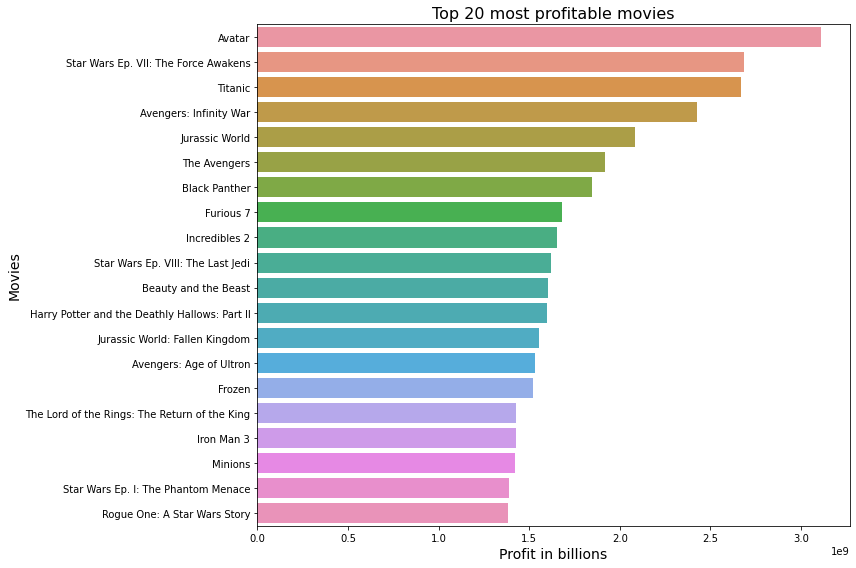

In [98]:
# top profit movies visualization
sns.barplot(data = top_profit_df, x = 'profit',y = 'movie' )
plt.title("Top 20 most profitable movies", fontsize = 16)
plt.ticklabel_format(style = 'Scientific', scilimits = (9,9), axis = 'x')
plt.xlabel('Profit in billions',fontsize = 14)
plt.ylabel('Movies' , fontsize = 14)
plt.tight_layout()
plt.savefig('q1_top_profit_movies.png')
plt.show()

Top 5 profit movies-Avatar, Stars Wars: The force awakens, Titanic,Avengers: Infinity War,Jurassic World

### Is there a correlation between total earnings and production budget?

#### calculate the correlation

In [34]:
df_corr= movie_budgets_df['total_gross'].corr(movie_budgets_df['production_budget'])
df_corr

0.7369220791291261

The correlation is fairly strong, but not near 100. It means there are some movies 
that didn't really make much profits or made zero profits given higher production budgets,
so it seems that that are many other factors that determine the profitability of a movie

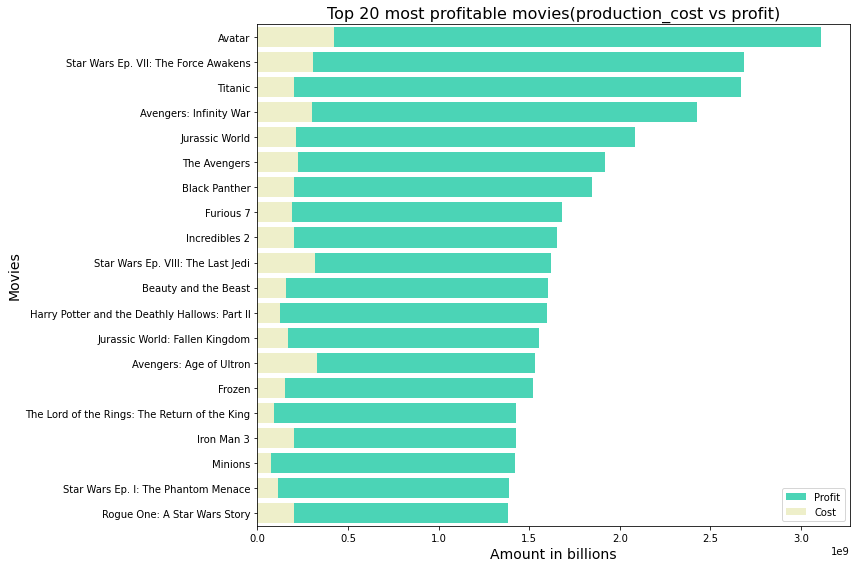

In [97]:
# visualization of top profitable movies production cost and profit earnings
sns.barplot(data = top_profit_df, x = 'profit',y = 'movie', label = 'Profit',color= '#34ebc3')
sns.barplot(data = top_profit_df, x = 'production_budget',y = 'movie' ,color = '#f4f5c4', label = 'Cost')
plt.title("Top 20 most profitable movies(production_cost vs profit)", fontsize=16)
plt.ticklabel_format(style = 'Scientific', scilimits=(9,9), axis= 'x')
plt.xlabel('Amount in billions',fontsize=14)
plt.legend()
plt.ylabel('Movies' , fontsize=14)
plt.tight_layout()
plt.savefig('q1_top_profit_movies_cost_profits.png')
plt.show()

As can be seen from the chart, some movies with less production budgets e.g Titanic made more profits than avengers infinity war
that had high production budget. In the same breath, Star wars:The Last Jedi spent alot of producing it, but the profits are
    not among the top

In [36]:
# check mean profits and production budget for top 20 profitable movies
print('mean_profit: ' + str(top_profit_df['profit'].mean()) + ' & mean_production_cost: ' + str(top_profit_df['production_budget'].mean()))

mean_profit: 1827142412.6 & mean_production_cost: 209830000.0


The company can set their production budget per movie at the mean production cost and expect a profit raging at the mean profit, although
ofcourse there are many factors that determine the success of a movie

In [37]:
#top 20 in movies in production budget vs profit
top_production_df = movie_budgets_df.sort_values(by = 'production_budget', ascending = False, ignore_index = True)[:20]
top_production_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129


C:\Users\charityg\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\charityg\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\charityg\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\charityg\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


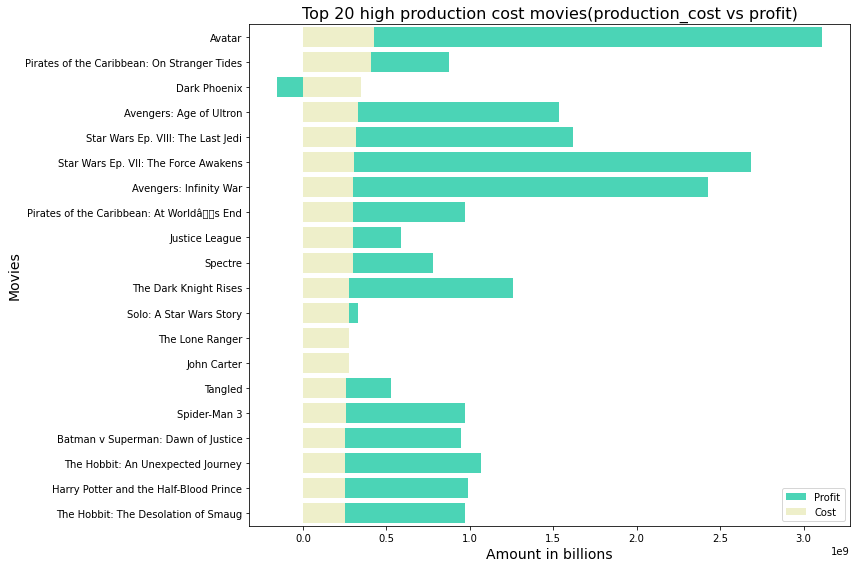

In [96]:
# visualization of top profitable movies production cost and profit earnings
sns.barplot(data = top_production_df, x = 'profit',y = 'movie', label = 'Profit',color= '#34ebc3')
sns.barplot(data = top_production_df, x = 'production_budget',y = 'movie' ,color = '#f4f5c4', label = 'Cost')
plt.title("Top 20 high production cost movies(production_cost vs profit)", fontsize = 16)
plt.ticklabel_format(style = 'Scientific', scilimits=(9,9), axis= 'x')
plt.xlabel('Amount in billions',fontsize = 14)
plt.legend()
plt.ylabel('Movies' , fontsize = 14)
plt.tight_layout()
plt.savefig('q1_top_production_movies_cost_profits.png')
plt.show()

Only 5 movies-Avatar,Avenger: Age of Ultron, Infinity Wars,Stars Wars: The Last Jedi,The Force Awakens, appear 
in the list of high production budgets and most profitable

In [39]:
# movies with profits<0
neg_profit_df = movie_budgets_df[movie_budgets_df['profit']<=0]
len(neg_profit_df)

1241

In [40]:
# I want to work with movies movies that have profit>0
profitable_movies_df = movie_budgets_df[movie_budgets_df['profit'] > 0]


## check which are the high profit studios as they will be the company competitors

In [41]:
profitable_movies_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2989973445,2683973445


In [42]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [43]:
# drop domestic_gross, foreign_gross, year columns from movie_gross_df then merge with pos_profit_df
movie_gross_df1 = movie_gross_df.drop(columns = ['domestic_gross','foreign_gross', 'year'], axis = 1)

In [44]:
#merge the dataframes
movie_studios = profitable_movies_df.merge(movie_gross_df1,right_on = 'title', left_on = 'movie')

In [45]:
movie_studios.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit,title,studio
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,Pirates of the Caribbean: On Stranger Tides,BV
1,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,Avengers: Age of Ultron,BV
2,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,Avengers: Infinity War,BV
3,"Nov 17, 2017",Justice League,300000000,229024295,655945209,884969504,584969504,Justice League,WB
4,"Nov 6, 2015",Spectre,300000000,200074175,879620923,1079695098,779695098,Spectre,Sony


#### Number of movies produced by each studio

In [46]:
#top 20 studios by number of movies produced
num_of_movies = movie_studios.studio.value_counts()[:20]
num_of_movies_df = pd.DataFrame(num_of_movies).reset_index()
num_of_movies_df.columns = ['studio', 'movie_number']
num_of_movies_df

,studio,movie_number
0,Uni.,111
1,Fox,105
2,WB,96
3,Sony,73
4,Par.,72
5,BV,70
6,LGF,57
7,FoxS,40
8,Focus,38
9,WB (NL),37


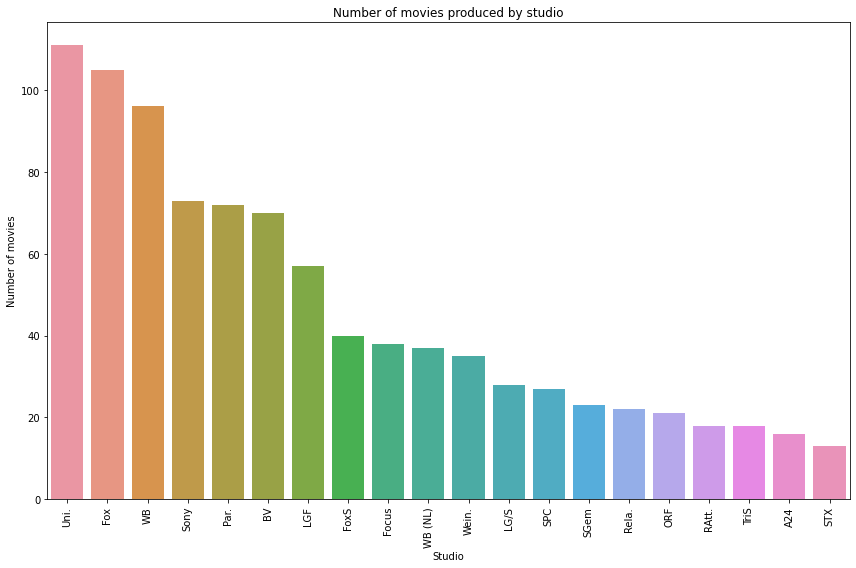

In [95]:
# visualization of top 20 studios in number of movies
sns.barplot(data = num_of_movies_df,x = 'studio', y = 'movie_number')
plt.xticks(rotation = 90)
plt.title('Number of movies produced by studio')
plt.xlabel('Studio')
plt.ylabel('Number of movies')
plt.tight_layout()
plt.savefig('q2_studio_movie_numbers.png')
plt.show()

#### profits per studio

In [48]:
#top 20 studios by profit
studio_profits = movie_studios.groupby('studio')['profit'].sum().sort_values(ascending = False)[:20]
studio_profits_df = pd.DataFrame(studio_profits).reset_index()
studio_profits_df.columns = ['studio', 'profit']
studio_profits_df

,studio,profit
0,BV,36867009248
1,Uni.,31537886215
2,Fox,28504965988
3,WB,23191288942
4,Sony,19618491109
5,Par.,15708243966
6,WB (NL),9809894397
7,LGF,8299053328
8,P/DW,5427701674
9,LG/S,3725432329


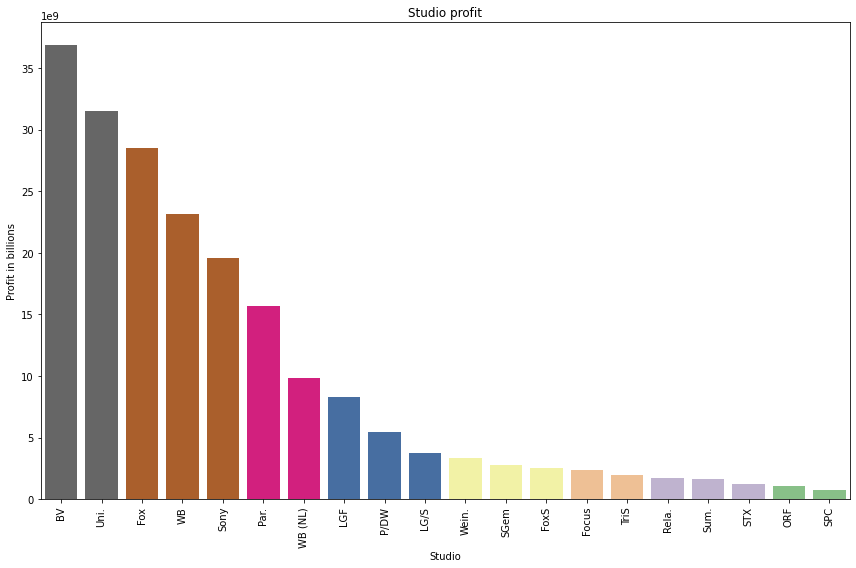

In [94]:
sns.barplot(data = studio_profits_df,x = 'studio', y = 'profit',palette = 'Accent_r')
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'scientific',scilimits = (9,9), axis = 'y')
plt.title('Studio profit')
plt.xlabel('Studio')
plt.ylabel('Profit in billions')
plt.tight_layout()
plt.savefig('q2_high_profit_studios.png')
plt.show()

In [50]:
#top 20 studios versus their profits
merged_df = num_of_movies_df.merge(studio_profits_df,on = 'studio',how = 'left')
merged_df

,studio,movie_number,profit
0,Uni.,111,3.153789e+10
1,Fox,105,2.850497e+10
2,WB,96,2.319129e+10
3,Sony,73,1.961849e+10
4,Par.,72,1.570824e+10
5,BV,70,3.686701e+10
6,LGF,57,8.299053e+09
7,FoxS,40,2.554376e+09
8,Focus,38,2.400446e+09
9,WB (NL),37,9.809894e+09


Most of the studios with high number of movies also have high profits, so these studios will be the company's main competitors

## Genres and their profits

In [51]:
movie_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre1,genre2,genre3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,Drama,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,None,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,Comedy,None,None


In [52]:
# merge movie_title_basics_df and pos_profit_df
genres_df=movie_title_basics_df.merge(profitable_movies_df, left_on = 'original_title', right_on = 'movie')

In [53]:
genres_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre1,genre2,genre3,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit
0,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",Adventure,Comedy,Drama,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,246098021,155098021
1,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",Action,Crime,Drama,"Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587,88126272,60126272
2,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2301125489,2086125489
3,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",Comedy,Family,None,"Apr 13, 2012",The Three Stooges,30000000,44338224,54052249,98390473,68390473
4,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,"Nov 24, 2010",Tangled,260000000,200821936,586477240,787299176,527299176


#### Number of movies per genre

In [54]:
# make a new dataframe that removes rows where genre3 and genre2=None
genres_df = genres_df[genres_df['genre2'] != 'None']
genres_df = genres_df[genres_df['genre3'] != 'None']

In [55]:
# group by genres
genre1_data = genres_df.genre1.value_counts()
genre1_df = pd.DataFrame(genre1_data).reset_index()
genre1_df.columns = ['genre','count']
genre1_df

,genre,count
0,Action,465
1,Drama,414
2,Comedy,332
3,Documentary,197
4,Adventure,179
5,Biography,144
6,Horror,133
7,Crime,88
8,Thriller,32
9,Animation,18


In [56]:
genre2_data = genres_df.genre2.value_counts()
genre2_df = pd.DataFrame(genre2_data).reset_index()
genre2_df.columns = ['genre','count']


In [57]:
genre3_data = genres_df.genre3.value_counts()
genre3_df=  pd.DataFrame(genre3_data).reset_index()
genre3_df.columns = ['genre','count']

In [58]:
# combine all genres and group them together
all_genres = pd.concat([genre1_df,genre2_df,genre3_df])
combined_genres = pd.DataFrame(all_genres.groupby('genre')['count'].sum().sort_values(ascending = False)).reset_index()
combined_genres.columns = ['genre','count']
combined_genres.head()

,genre,count
0,Drama,945
1,Comedy,550
2,Action,465
3,Adventure,380
4,Thriller,325


#### profit per genre

In [59]:
#Group genres by profit
genre1_profit = genres_df.groupby('genre1')['profit'].sum()
genre2_profit = genres_df.groupby('genre2')['profit'].sum()
genre3_profit = genres_df.groupby('genre3')['profit'].sum()


In [60]:
#Combine the data frames
genre_total_profit = pd.DataFrame(pd.concat([genre1_profit, genre2_profit, genre3_profit]))
genre_total_profit.head()

,profit
Action,119494859266
Adventure,54705784013
Animation,6307437537
Biography,16039282019
Comedy,32651866510


In [61]:
#Group them together using the genre type
combined_genre_profit = pd.DataFrame(genre_total_profit.groupby(genre_total_profit.index)['profit'].sum().sort_values(ascending = False)).reset_index()
combined_genre_profit.columns = ['genre','profit']
combined_genre_profit

,genre,profit
0,Adventure,137772278834
1,Action,119494859266
2,Drama,96178297667
3,Comedy,91794666721
4,Sci-Fi,51850719398
5,Animation,46186574667
6,Thriller,43668487212
7,Fantasy,38406065601
8,Family,33799386195
9,Documentary,30088717095


In [62]:

merged_genre_df = combined_genres.merge(combined_genre_profit, on = 'genre')
merged_genre_df.head()

,genre,count,profit
0,Drama,945,96178297667
1,Comedy,550,91794666721
2,Action,465,119494859266
3,Adventure,380,137772278834
4,Thriller,325,43668487212


In [63]:
# average profit->profit/number of movies
merged_genre_df['avg_profit'] = merged_genre_df['profit'] / merged_genre_df['count']

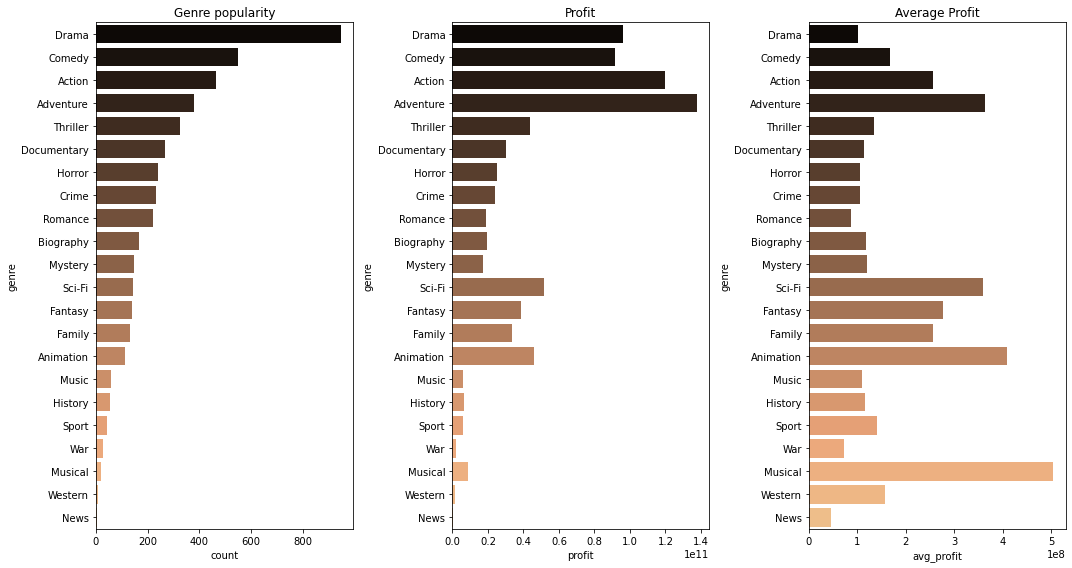

In [64]:
fig,axes = plt.subplots(figsize=  (15,8), ncols = 3)
sns.barplot(data = merged_genre_df, x='count', y = 'genre', ax=axes[0] ,palette='copper')
axes[0].set_title('Genre popularity')
sns.barplot(data = merged_genre_df,x = 'profit', y = 'genre',ax=axes[1] ,palette='copper')
axes[1].set_title('Profit')
#axes[1].set_ylabel(None)
#axes[1].set_yticklabels([])
sns.barplot(data = merged_genre_df,x = 'avg_profit', y = 'genre',ax=axes[2], palette='copper')
axes[2].set_title('Average Profit')
#axes[2].set_ylabel(None)
#axes[2].set_yticklabels([]);
plt.tight_layout()
plt.savefig('q3_genres comparison.png')
plt.show()


Adventure and Action have higher profits despite them being not as popular as Drama and Comedy.  Also Animation,Musical and 
Scifi seem to have high average profits too.So the company can try to make a combination of Adventure,Action, Animation and 
Scifi with some bit of Drama,Musicals and Comedy

In [65]:
# further analysis -popularity of top 5 genres over time and profitability of top 5 genres over time
#- break the genre df into 5 separate dataframes of the top 5 genres, group by year

## Movie Directors -Number of movies and Profitability

In [66]:
movie_titles = pd.read_csv('zippedData/title.basics.csv')
movie_titles.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [67]:
# drop null runtime minutes,original title and genres
movie_titles.dropna(subset = ['runtime_minutes','genres'],inplace = True)

In [68]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129


In [69]:
#merge movie-titles with the movie_budget
merged_df1 = movie_titles.merge(movie_budgets_df,left_on = 'original_title' ,right_on ='movie')
merged_df1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy","Dec 31, 2012",Foodfight!,45000000,0,73706,73706,-44926294
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance","Mar 22, 2013",On the Road,25000000,720828,9313302,10034130,-14965870
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,"Mar 22, 2013",On the Road,25000000,720828,9313302,10034130,-14965870
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,"Mar 22, 2013",On the Road,25000000,720828,9313302,10034130,-14965870
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,"Mar 22, 2013",On the Road,25000000,720828,9313302,10034130,-14965870


### Load and prepare title crew csv

In [70]:
title_crew = pd.read_csv('zippedData/title.crew.csv')
title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [71]:
title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [72]:
# drop null directors values and drop writers column
title_crew.dropna(subset = ['directors'] ,inplace = True)
title_crew.drop(columns = 'writers',axis=1, inplace = True)

In [73]:
# merge the two dataframes to get directors code e.g nm5281451
merged_df2 = merged_df1.merge(title_crew, on = 'tconst')
merged_df2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit,directors
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy","Dec 31, 2012",Foodfight!,45000000,0,73706,73706,-44926294,nm0440415
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance","Mar 22, 2013",On the Road,25000000,720828,9313302,10034130,-14965870,nm0758574
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,"Mar 22, 2013",On the Road,25000000,720828,9313302,10034130,-14965870,nm5281451
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,"Mar 22, 2013",On the Road,25000000,720828,9313302,10034130,-14965870,nm4953104
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,"Mar 22, 2013",On the Road,25000000,720828,9313302,10034130,-14965870,nm7042169


### Load and prepare name basics csv

In [74]:
name_basics = pd.read_csv('zippedData/name.basics.csv')
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [75]:
#remove unnecessary columns
name_basics.drop(columns = ['birth_year', 'death_year', 'primary_profession', 'known_for_titles'],axis = 1, inplace = True)

In [76]:
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   nconst        606648 non-null  object
 1   primary_name  606648 non-null  object
dtypes: object(2)
memory usage: 9.3+ MB


In [77]:
# merge the dataframes again to get director names
directors_combined_df = merged_df2.merge(name_basics, left_on = 'directors', right_on = 'nconst')
directors_combined_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit,directors,nconst,primary_name
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy","Dec 31, 2012",Foodfight!,45000000,0,73706,73706,-44926294,nm0440415,nm0440415,Lawrence Kasanoff
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance","Mar 22, 2013",On the Road,25000000,720828,9313302,10034130,-14965870,nm0758574,nm0758574,Walter Salles
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,"Mar 22, 2013",On the Road,25000000,720828,9313302,10034130,-14965870,nm5281451,nm5281451,Harutyun Azaryan
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,"Mar 22, 2013",On the Road,25000000,720828,9313302,10034130,-14965870,nm4953104,nm4953104,Marvin Dau
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,"Mar 22, 2013",On the Road,25000000,720828,9313302,10034130,-14965870,nm7042169,nm7042169,Poong-ki Kim


#### top most directors by number of movies

In [78]:
top_20_directors = pd.DataFrame(directors_combined_df.primary_name.value_counts()[:20]).reset_index()
top_20_directors.columns=['name','count']
top_20_directors

,name,count
0,David Gordon Green,8
1,Clint Eastwood,7
2,Steven Soderbergh,7
3,Steven Spielberg,7
4,Ridley Scott,7
5,Jon M. Chu,6
6,Jaume Collet-Serra,6
7,M. Night Shyamalan,5
8,Antoine Fuqua,5
9,Kenneth Branagh,5


#### get the profits made by each of those top 20 directors

In [79]:
# check the dataframe for the top 20 directors in movie numbers
list1 = list(top_20_directors['name'])
top_20_movie_df = directors_combined_df[directors_combined_df['primary_name'].isin(list1)]
top_20_movie_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit,directors,nconst,primary_name
30,tt0443272,Lincoln,Lincoln,2012,150.0,"Biography,Drama,History","Nov 9, 2012",Lincoln,65000000,182207973,273346281,455554254,390554254,nm0000229,nm0000229,Steven Spielberg
31,tt0983193,The Adventures of Tintin,The Adventures of Tintin,2011,107.0,"Action,Adventure,Animation","Dec 21, 2011",The Adventures of Tintin,130000000,77591831,373993951,451585782,321585782,nm0000229,nm0000229,Steven Spielberg
32,tt1568911,War Horse,War Horse,2011,146.0,"Drama,History,War","Dec 25, 2011",War Horse,70000000,79883359,156815529,236698888,166698888,nm0000229,nm0000229,Steven Spielberg
33,tt1677720,Ready Player One,Ready Player One,2018,140.0,"Action,Adventure,Sci-Fi","Mar 29, 2018",Ready Player One,150000000,137690172,579290136,716980308,566980308,nm0000229,nm0000229,Steven Spielberg
34,tt3682448,Bridge of Spies,Bridge of Spies,2015,142.0,"Drama,History,Thriller","Oct 16, 2015",Bridge of Spies,40000000,72313754,162498338,234812092,194812092,nm0000229,nm0000229,Steven Spielberg


In [80]:
#calculate profits of the top 20 in movie numbers 
top_20_movie_profits = pd.DataFrame(top_20_movie_df.groupby('primary_name')['profit'].sum().sort_values(ascending = False)[:20]).reset_index()
top_20_movie_profits.columns = ['name','profit']
top_20_movie_profits

,name,profit
0,Francis Lawrence,3170303599
1,Zack Snyder,2413417936
2,Kenneth Branagh,1982455460
3,Steven Spielberg,1967414112
4,Ridley Scott,1886244031
5,Tim Burton,1725738256
6,Clint Eastwood,1680730918
7,Paul Feig,1624614571
8,M. Night Shyamalan,1390836652
9,Jon M. Chu,1381187896


In [81]:
#merge the dataframes to get their profits and their number of movies together
merged_df3 = top_20_directors.merge(top_20_movie_profits , on = 'name')
merged_df3

,name,count,profit
0,David Gordon Green,8,660385637
1,Clint Eastwood,7,1680730918
2,Steven Soderbergh,7,595080296
3,Steven Spielberg,7,1967414112
4,Ridley Scott,7,1886244031
5,Jon M. Chu,6,1381187896
6,Jaume Collet-Serra,6,726253788
7,M. Night Shyamalan,5,1390836652
8,Antoine Fuqua,5,939314596
9,Kenneth Branagh,5,1982455460


In [82]:
#get their average profits
merged_df3['Avg_profit'] = merged_df3['profit'] / merged_df3['count']

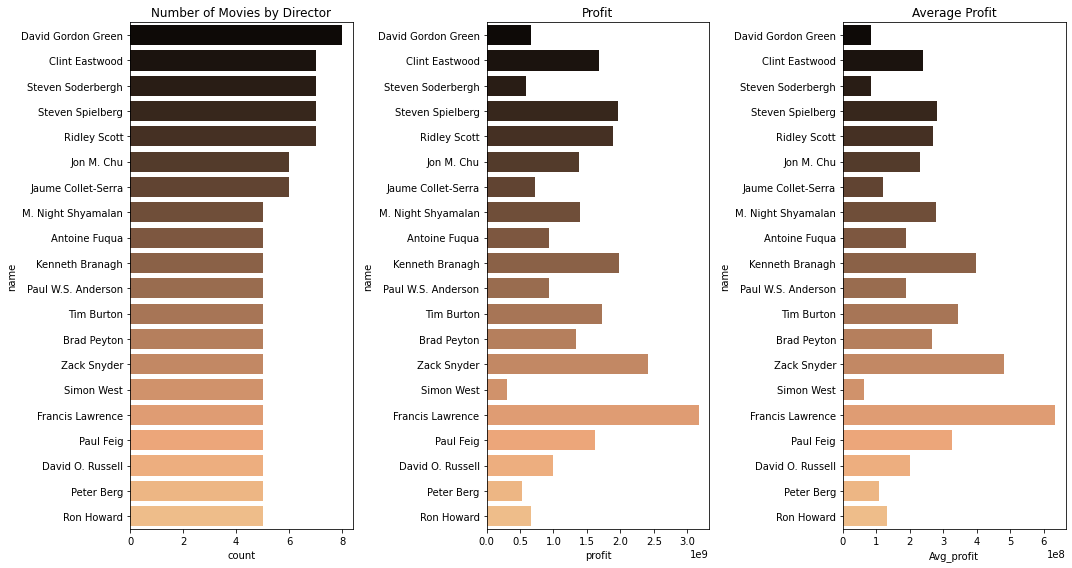

In [84]:
fig,axes = plt.subplots(figsize=(15,8), ncols = 3)
sns.barplot(data = merged_df3, x='count', y = 'name', ax = axes[0] ,palette = 'copper')
axes[0].set_title('Number of Movies by Director')
sns.barplot(data = merged_df3,x = 'profit', y = 'name',ax = axes[1] ,palette = 'copper')
axes[1].set_title('Profit')
sns.barplot(data = merged_df3,x = 'Avg_profit', y = 'name',ax=axes[2] ,palette = 'copper')
axes[2].set_title('Average Profit')
plt.tight_layout()
plt.savefig('q4_top_movie_directors_vs_profit.png')
plt.show()

Directing many movies doesnt necessarily translate to making highest profits as can be seen from the charts, the first and third directors have high number of movies but less profits. Likewise, from the 8th director onwards, they have same number of movies but different profits some with higher and others lower. Director Francis Lawrence is a point of interest, quite high profits

#### top_directors by profitability

In [85]:
top_20_profitable = pd.DataFrame(directors_combined_df.groupby('primary_name')['profit'].sum().sort_values(ascending = False)[:20]).reset_index()
top_20_profitable.columns = ['name','profit']
top_20_profitable

,name,profit
0,Joss Whedon,3496704783
1,Christopher Nolan,3454981952
2,Francis Lawrence,3170303599
3,Michael Bay,3041871843
4,Peter Jackson,2989438255
5,Ravi Punj,2667572339
6,Bill Condon,2551110613
7,Bryan Singer,2425928231
8,Zack Snyder,2413417936
9,Ryan Coogler,2127401595


#### how many movies produced by these top profit directors

In [86]:
# check the dataframe for the top 20 directors in profitability
list2 = list(top_20_profitable['name'])
top_director_movies = directors_combined_df[directors_combined_df['primary_name'].isin(list2)]
top_director_movies.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,profit,directors,nconst,primary_name
11,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi","Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2301125489,2086125489,nm1119880,nm1119880,Colin Trevorrow
12,tt1862079,Safety Not Guaranteed,Safety Not Guaranteed,2012,86.0,"Comedy,Drama,Romance","Jun 8, 2012",Safety Not Guaranteed,750000,4010957,4422318,8433275,7683275,nm1119880,nm1119880,Colin Trevorrow
30,tt0443272,Lincoln,Lincoln,2012,150.0,"Biography,Drama,History","Nov 9, 2012",Lincoln,65000000,182207973,273346281,455554254,390554254,nm0000229,nm0000229,Steven Spielberg
31,tt0983193,The Adventures of Tintin,The Adventures of Tintin,2011,107.0,"Action,Adventure,Animation","Dec 21, 2011",The Adventures of Tintin,130000000,77591831,373993951,451585782,321585782,nm0000229,nm0000229,Steven Spielberg
32,tt1568911,War Horse,War Horse,2011,146.0,"Drama,History,War","Dec 25, 2011",War Horse,70000000,79883359,156815529,236698888,166698888,nm0000229,nm0000229,Steven Spielberg


In [87]:
#calculate number of movies produced by top 20 in profitability
movie_numbers = pd.DataFrame(top_director_movies.primary_name.value_counts()).reset_index()
movie_numbers.columns = ['name', 'count']
movie_numbers

,name,count
0,Ridley Scott,7
1,Steven Spielberg,7
2,Francis Lawrence,5
3,Zack Snyder,5
4,Kenneth Branagh,5
5,Bryan Singer,4
6,Christopher Nolan,4
7,Joss Whedon,4
8,Guy Ritchie,4
9,Michael Bay,4


In [88]:
#merge the dataframes
merged_df4 = top_20_profitable.merge(movie_numbers , on = 'name')
merged_df4

,name,profit,count
0,Joss Whedon,3496704783,4
1,Christopher Nolan,3454981952,4
2,Francis Lawrence,3170303599,5
3,Michael Bay,3041871843,4
4,Peter Jackson,2989438255,3
5,Ravi Punj,2667572339,1
6,Bill Condon,2551110613,3
7,Bryan Singer,2425928231,4
8,Zack Snyder,2413417936,5
9,Ryan Coogler,2127401595,3


In [89]:
#their average profits
merged_df4['Avg_profit'] = merged_df4['profit'] / merged_df4['count']

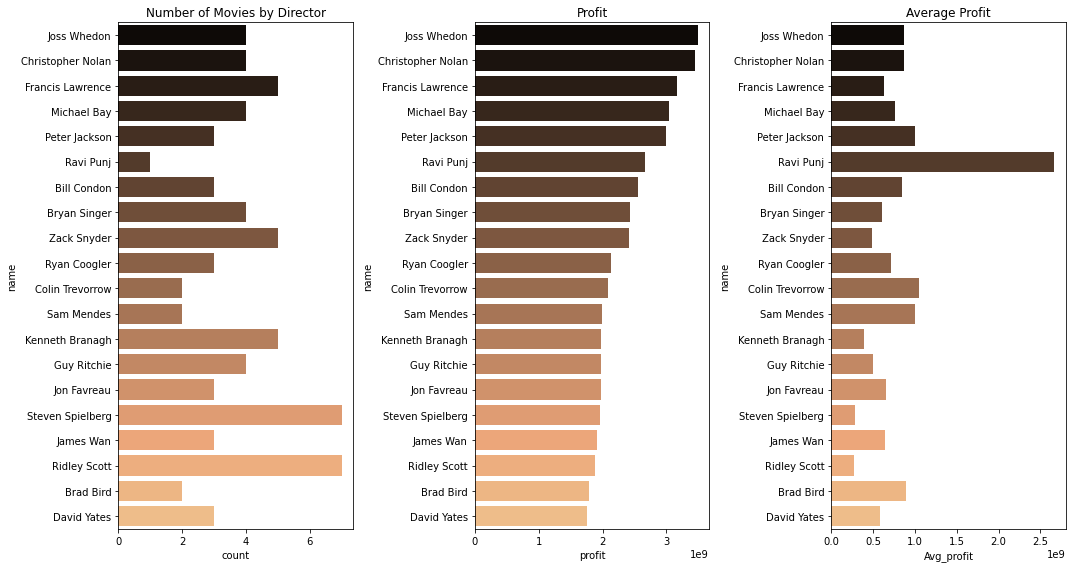

In [90]:
fig,axes = plt.subplots(figsize = (15,8), ncols = 3)
sns.barplot(data = merged_df4, x = 'count', y = 'name', ax = axes[0] ,palette = 'copper')
axes[0].set_title('Number of Movies by Director')
sns.barplot(data = merged_df4,x = 'profit', y = 'name',ax = axes[1] ,palette = 'copper')
axes[1].set_title('Profit')
sns.barplot(data = merged_df4,x = 'Avg_profit', y = 'name',ax = axes[2] ,palette = 'copper')
axes[2].set_title('Average Profit')
plt.tight_layout()
plt.savefig('q4_top_profit_directors.png')
plt.show()

As the chart shows,top most directors in terms of high profit have directed <=5 movies. Top recommended directors are Joss Weldon,Christopher Nolan, Francis Lawrence, Michael Bay, Peter Jackson. Ravi only has 1 movie so its not enough to determine his probability of making high profits on directing more movies

In [ ]:
#more analysis
#1. directors with high movie rating, popularity
#2. effect of profitability vs movie rating, popularity
# 3.profitable actors with high ratings ,popularity
#4.run time vs profits

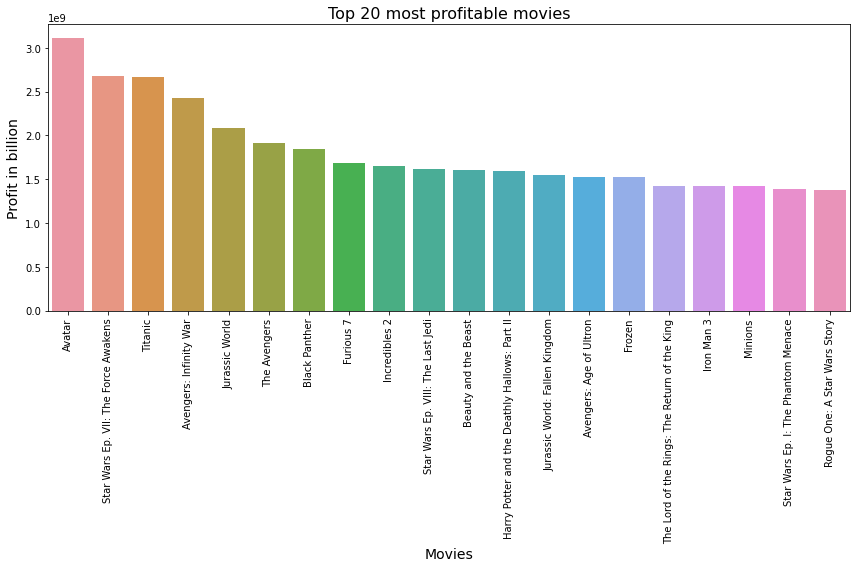

In [93]:
# top profit movies visualization
sns.barplot(data = top_profit_df, x = 'movie',y = 'profit' )
plt.title("Top 20 most profitable movies", fontsize = 16)
plt.ticklabel_format(style = 'Scientific', scilimits = (9,9), axis = 'y')
plt.xticks(rotation=90)
plt.xlabel('Movies',fontsize = 14)
plt.ylabel('Profit in billion' , fontsize = 14)
plt.tight_layout()
plt.savefig('q1_top_profit_movies1.png')
plt.show()